<a href="https://colab.research.google.com/github/VishalPrem1994/AIGenPlayGround/blob/main/Img2Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install openai numpy opencv-python accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers diffusers omegaconf requests

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
import requests
import torch
from PIL import Image
from io import BytesIO
import torch
from torch import autocast
from diffusers import StableDiffusionImg2ImgPipeline

model_path = "/content/drive/MyDrive/stable_diffusion_weights/RevAnim"
torch.cuda.empty_cache()

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_path, safety_checker=None, torch_dtype=torch.float16)
pipe = pipe.to(device)

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
g_cuda = torch.Generator(device='cuda')
seed = 4248775099 #@param {type:"number"}
g_cuda.manual_seed(seed)

url = "https://cdn.create.vista.com/api/media/medium/253592486/stock-photo-shirtless-man-kissing-shoulder-brunette?token=" #@param {type:"string"}
prompt = "anime, sexy girl, highly detailed, intricate, natural lighting" #@param {type:"string"}
negative_prompt = "(worst quality:1.4), (low quality:1.4), child, deformed, deformed face, bad hands, bad fingers, bad hands, (3d, render, cgi, doll, painting:1.4), long body, blurry, duplicate, cloned, duplicate body parts, disfigured, extra limbs, fused fingers, extra fingers, twisted, malformed hands, mutated hands and fingers, conjoined, missing limbs, bad anatomy, bad proportions, logo, signature, text, words, lowres, boring, mutated, artifacts, gross, ugly, stretch, smooth skin texture" #@param {type:"string"}
num_samples = 1 #@param {type:"number"}
guidance_scale = 8 #@param {type:"number"}
strength = 0.4 #@param {type:"number"}
num_inference_steps = 50


response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
# init_image = init_image.resize((500,800))

with autocast("cuda"), torch.inference_mode():
  images = pipe(
      prompt=prompt,
      image=init_image,
      strength=strength,
      guidance_scale=guidance_scale,
      num_images_per_prompt = num_samples,
      num_inference_steps = num_inference_steps,
      generator=g_cuda
      ).images

for img in images:
    display(img)

In [122]:
url = "https://cdn.create.vista.com/api/media/medium/253592486/stock-photo-shirtless-man-kissing-shoulder-brunette?token=" #@param {type:"string"}
prompt = "anime, sexy girl, highly detailed, intricate, natural lighting" #@param {type:"string"}
negative_prompt = "(worst quality:1.4), (low quality:1.4), child, deformed, deformed face, bad hands, bad fingers, bad hands, (3d, render, cgi, doll, painting:1.4), long body, blurry, duplicate, cloned, duplicate body parts, disfigured, extra limbs, fused fingers, extra fingers, twisted, malformed hands, mutated hands and fingers, conjoined, missing limbs, bad anatomy, bad proportions, logo, signature, text, words, lowres, boring, mutated, artifacts, gross, ugly, stretch, smooth skin texture" #@param {type:"string"}
num_samples = 1 #@param {type:"number"}
guidance_scale = 8 #@param {type:"number"}
strength = 0.4 #@param {type:"number"}
num_inference_steps = 50

In [ ]:
import os
main_path = "/content/drive/MyDrive/AI/VideoInput/"
selected_folder = "Bike1"
fullpath = main_path+selected_folder
prompt = "anime, sexy girl, highly detailed, intricate, natural lighting"

main_name = str(os.listdir(fullpath)[0]).split("-")[0]
os.makedirs(fullpath+"/Output", exist_ok=True)

with autocast("cuda"), torch.inference_mode():
  for i in os.listdir(fullpath):
    print(i)
    init_image = Image.open(fullpath+"/"+i).convert("RGB")
    images = pipe(
        prompt=prompt,
        image=init_image,
        strength=strength,
        guidance_scale=guidance_scale,
        num_images_per_prompt = num_samples,
        num_inference_steps = num_inference_steps,
        generator=g_cuda
        ).images
  for img in images:
      display(img)

ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-6.jpg


  0%|          | 0/20 [00:00<?, ?it/s]

test.jpg


  0%|          | 0/20 [00:00<?, ?it/s]

ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-24.jpg


  0%|          | 0/20 [00:00<?, ?it/s]

ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-23.jpg


  0%|          | 0/20 [00:00<?, ?it/s]

ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-22.jpg


  0%|          | 0/20 [00:00<?, ?it/s]

ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-21.jpg


ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-6.jpg
test.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-24.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-23.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-22.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-21.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-20.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-19.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-15.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-18.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-12.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-14.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-16.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-17.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-11.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-13.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-10.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3M144WAC-7.jpg
ee5b8ebc26ae49a5b9f978a5875686a1UwPy7LYX3

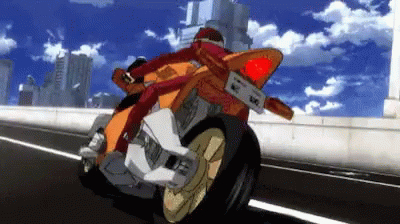

In [77]:
g_cuda = torch.Generator(device='cuda')
seed = 4248775099 #@param {type:"number"}
g_cuda.manual_seed(seed)

url = "https://cdn.create.vista.com/api/media/medium/253592486/stock-photo-shirtless-man-kissing-shoulder-brunette?token=" #@param {type:"string"}
prompt = "anime, sexy girl, highly detailed, intricate, natural lighting" #@param {type:"string"}
negative_prompt = "(worst quality:1.4), (low quality:1.4), child, deformed, deformed face, bad hands, bad fingers, bad hands, (3d, render, cgi, doll, painting:1.4), long body, blurry, duplicate, cloned, duplicate body parts, disfigured, extra limbs, fused fingers, extra fingers, twisted, malformed hands, mutated hands and fingers, conjoined, missing limbs, bad anatomy, bad proportions, logo, signature, text, words, lowres, boring, mutated, artifacts, gross, ugly, stretch, smooth skin texture" #@param {type:"string"}
num_samples = 1 #@param {type:"number"}
guidance_scale = 8 #@param {type:"number"}
strength = 0.4 #@param {type:"number"}
num_inference_steps = 50


response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
# init_image = init_image.resize((500,800))

with autocast("cuda"), torch.inference_mode():
  images = pipe(
      prompt=prompt,
      image=init_image,
      strength=strength,
      guidance_scale=guidance_scale,
      num_images_per_prompt = num_samples,
      num_inference_steps = num_inference_steps,
      generator=g_cuda
      ).images

for img in images:
    display(img)